In [1]:
#####Capstone RMBS model Spring 2021 for Springboard Data Science Track #####

In [2]:
###Load required pacakages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns

import scipy.stats as stats
import sklearn

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
#EDA data filepath downloaded and stored here
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv'

In [5]:
load=pd.read_csv(filename, header =0, index_col=['Loan_Sequence_Number','Monthly_Reporting_Period'])

In [6]:
df =load

In [7]:
df= df.sample(n=None, frac=.01, replace=False, weights=None, random_state=123, axis=None)

In [8]:
df = df.reset_index()

In [9]:
drop_features =['Loan_Sequence_Number', 'Monthly_Reporting_Period','Maturity_Date',
                'Prepayment_Penalty_Flag','Orig_Year','Remaining_Months_to_Legal_Maturity',
                'Current_Deferred_UPB', 'Actual_Loss_Calculation', 'Modification_Flag',
               'Ever_Default', 'prin_repay_pct','Zero_Balance_Removal_UPB','MI%', 'Number_of_Units', 'Occupancy_Status', 
                'Original_CLTV','First_Time_Homebuyer_Flag','Channel','Occupancy_Status','Property_Type',
               'Number_of_Borrowers','Loss_Severity','Zero_Balance_Code','Original_Loan_Term','Loan_Purpose']

In [10]:
df.drop(labels=drop_features,axis=1, inplace=True)

In [11]:
df['Target_Performance_Variable'].unique()

array(['Current', '1m_DQ', '2m_DQ', '7m_to_12m_DQ', '6m_DQ', '3m_DQ',
       'Default', '>24m_DQ', '13m_to_24m_DQ', '4m_DQ', '5m_DQ'],
      dtype=object)

In [12]:
y = df['Target_Performance_Variable']
df.drop('Target_Performance_Variable', axis=1, inplace=True)

In [13]:
df = pd.get_dummies(df,drop_first=True)

In [14]:
X=df

In [15]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from xgboost import XGBClassifier 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [16]:
steps = [('over', SMOTE()), ('model', XGBClassifier())]
pipeline = Pipeline(steps=steps)

In [17]:
# evaluate pipeline
#for scoring in["accuracy", "roc_auc"]:
#    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
#    scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
#    print("Model", scoring, " mean=", scores.mean() , "stddev=", scores.std())

In [18]:
#Model accuracy  mean= 0.957785674266226 stddev= 0.0020689916855740876

In [19]:
from xgboost import XGBClassifier

In [20]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder 

In [21]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y)

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [23]:
from sklearn.preprocessing import LabelEncoder 
lc = LabelEncoder() 

lc = lc.fit(y) 

lc_y = lc.transform(y)

In [24]:
model = XGBClassifier()

In [25]:
model.fit(X_train, y_train,sample_weight=sample_weights)

XGBClassifier(objective='multi:softprob')

In [26]:
y_pred = model.predict(X_test)

In [27]:
import pickle
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/final_XGB_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
from sklearn.metrics import accuracy_score
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.92%


In [56]:
# define evaluation procedure
#*cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#*scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
#*print('Mean ROC AUC: %.5f' % np.mean(scores))

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
#*weights = [10,100,1000,10000]
#*param_grid = dict(scale_pos_weight=weights)
#*cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
#*grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
#*grid_result = grid.fit(X, y)
# report the best configuration
#*print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
#*means = grid_result.cv_results_['mean_test_score']
#*stds = grid_result.cv_results_['std_test_score']
#*params = grid_result.cv_results_['params']
#*for mean, stdev, param in zip(means, stds, params):
#*    print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'scale_pos_weight': 10}
nan (nan) with: {'scale_pos_weight': 10}
nan (nan) with: {'scale_pos_weight': 100}
nan (nan) with: {'scale_pos_weight': 1000}
nan (nan) with: {'scale_pos_weight': 10000}


In [ ]:
#Best: nan using {'scale_pos_weight': 10}
#nan (nan) with: {'scale_pos_weight': 10}
#nan (nan) with: {'scale_pos_weight': 100}
#nan (nan) with: {'scale_pos_weight': 1000}
#nan (nan) with: {'scale_pos_weight': 10000}

In [32]:
for c in range(len(X_train.columns)):
    print(X_train.columns[c])
    try:
        print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[c] * 100, 2)}
        % Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[c] * 100, 2)}''')
        print ('_________')
    except:
        continue
print('END')

Current_Actual_UPB
% Positive class in Train = 96.86
        % Positive class in Test  = 96.92
_________
Credit_Score
% Positive class in Train = 1.41
        % Positive class in Test  = 1.38
_________
Original_DTI
% Positive class in Train = 0.43
        % Positive class in Test  = 0.45
_________
Original_UPB
% Positive class in Train = 0.32
        % Positive class in Test  = 0.32
_________
Original_LTV
% Positive class in Train = 0.23
        % Positive class in Test  = 0.22
_________
Loan_Age
% Positive class in Train = 0.2
        % Positive class in Test  = 0.2
_________
Current_Interest_Rate
% Positive class in Train = 0.16
        % Positive class in Test  = 0.15
_________
CS_HP
% Positive class in Train = 0.15
        % Positive class in Test  = 0.14
_________
UNEMPLOY
% Positive class in Train = 0.11
        % Positive class in Test  = 0.1
_________
LF_Part
% Positive class in Train = 0.09
        % Positive class in Test  = 0.09
_________
Y10_CMT
% Positive class in Train = 

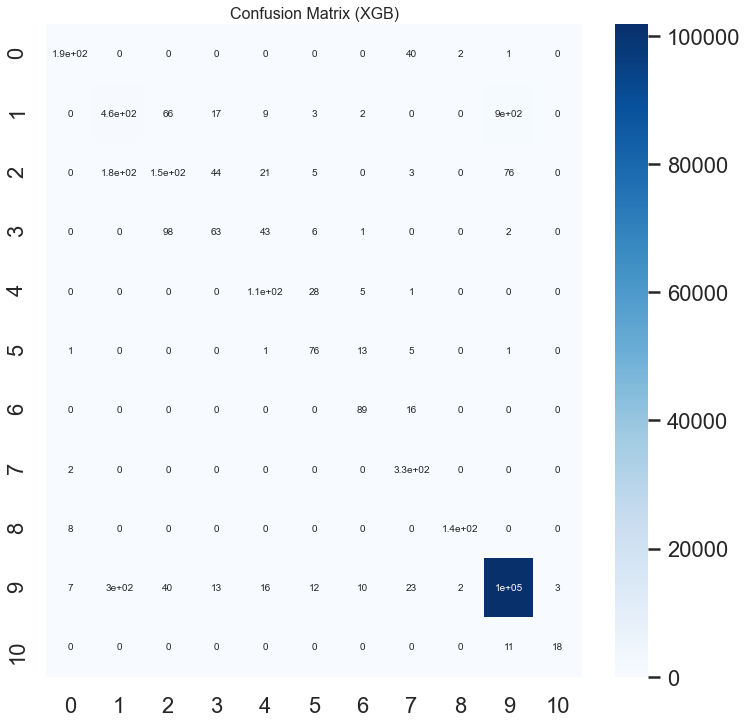

In [33]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = XGBClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Evaluate
#print(f'Accuracy = {accuracy_score(y_test, y_preds):.2f}\nRecall = {recall_score(y_test, y_preds):.2f}\n')
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 10})
plt.title('Confusion Matrix (XGB)' , size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

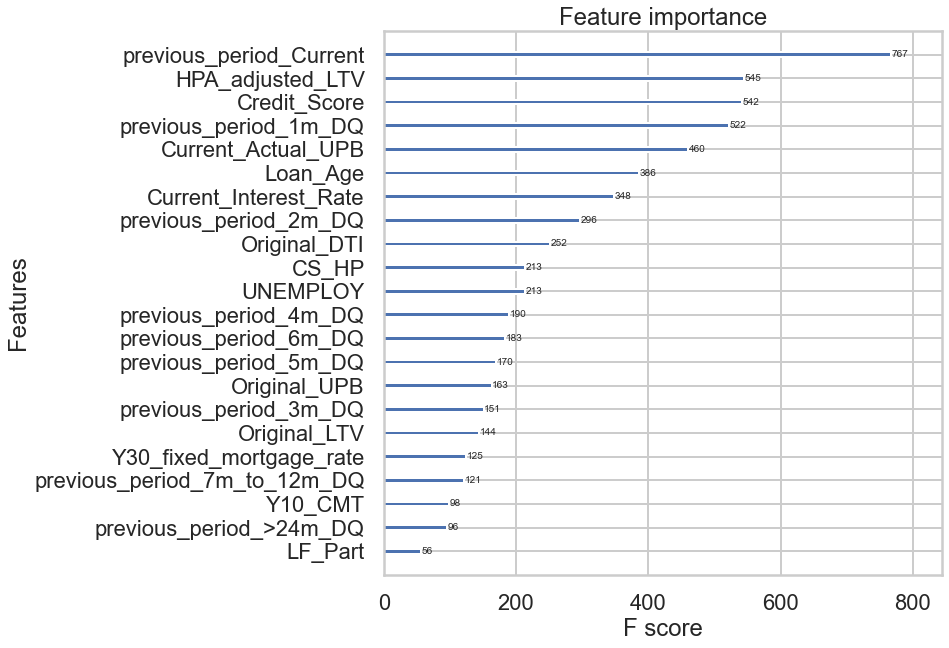

In [34]:
from xgboost import plot_importance
from matplotlib.pyplot import figure
# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 10)

plt.show()

In [35]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [76]:
from sklearn.preprocessing import LabelBinarizer

In [77]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [78]:
multiclass_roc_auc_score(y_test, pred)

0.825668744830785